# Test representation visualization

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

In [2]:
X_TEST_PATH = 'data/RoBERTa/generated_features/cdr3_test.parquet'
Y_TEST_PATH = 'data/targets_data/clusters/Galson_2016.parquet'
FULL_DATA_PATH = 'data/combined/clustered/final/Galson_2016.parquet'
REPRESENTATION_TYPE = 'RoBERTa CDR3'

## Load data

In [3]:
import pandas as pd

features_data = pd.read_parquet(X_TEST_PATH)

features_data.info()
features_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682432 entries, 0 to 1682431
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 1.6 GB


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.873695,-1.173280,0.443179,1.083448,1.060922,-0.593702,-0.306506,-1.166839,0.102757,0.181885,...,0.183056,-0.160208,1.159314,1.314316,-0.017076,0.909953,0.031456,-2.396828,-0.228519,1.496165
1,0.147311,0.756205,-0.965873,1.071524,0.825198,-0.952608,0.724919,-0.383349,-0.727512,0.443040,...,0.702138,-0.263948,0.525692,2.043518,0.597035,1.454960,-0.258555,-1.991723,0.405571,0.485421
2,0.454245,0.639020,-0.566455,1.431000,0.870048,-1.392849,0.017748,-0.309021,0.074476,0.573044,...,1.160136,-0.736517,0.315221,1.721812,0.376713,1.440295,0.255623,-2.124778,-0.466523,0.641157
3,-1.080044,-0.255657,-1.753345,0.353048,0.367800,0.395877,0.146245,0.377158,-0.862039,1.037152,...,0.919800,-0.025260,-0.103437,2.448894,0.105669,0.453965,-0.509134,-0.577600,-0.024651,0.916114
4,-1.211148,0.155689,-1.405699,0.397051,0.173281,0.082710,0.222240,0.496254,-0.253359,1.173169,...,0.799832,-0.262035,-0.164181,1.836121,0.481579,1.056540,0.295605,-1.869543,-0.145908,1.089256


In [4]:
y_data = pd.read_parquet(Y_TEST_PATH)['HepB']

y_data.head()

Cluster_ID
0     True
1    False
2    False
3    False
4     True
Name: HepB, dtype: bool

In [5]:
pos_features_data = features_data[y_data]

pos_features_data.info()
pos_features_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229352 entries, 0 to 1682426
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 225.7 MB


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.873695,-1.173280,0.443179,1.083448,1.060922,-0.593702,-0.306506,-1.166839,0.102757,0.181885,...,0.183056,-0.160208,1.159314,1.314316,-0.017076,0.909953,0.031456,-2.396828,-0.228519,1.496165
4,-1.211148,0.155689,-1.405699,0.397051,0.173281,0.082710,0.222240,0.496254,-0.253359,1.173169,...,0.799832,-0.262035,-0.164181,1.836121,0.481579,1.056540,0.295605,-1.869543,-0.145908,1.089256
5,-0.003704,-0.565799,-1.110731,0.735683,0.992756,-0.586104,-0.656756,-0.315934,0.236059,1.760328,...,0.132619,-0.408257,-0.229302,1.795291,-0.172450,1.130714,0.549605,-1.204962,-0.429391,1.367068
10,0.325254,-1.033958,-0.824050,1.171780,0.853084,-0.347768,-0.190556,-0.155007,-0.769722,1.299147,...,0.841884,-0.589384,0.623454,1.578606,0.090387,1.927229,0.219269,-1.503036,-1.005492,0.687326
14,-0.986628,0.237304,-1.834418,0.779114,0.399949,-0.375217,0.083803,-1.344073,-0.185311,1.593885,...,0.876767,-1.022360,0.260938,1.965386,-0.092050,2.098325,-0.415316,-1.565307,-0.416959,0.593242


In [10]:
clustered_data = pd.read_parquet(FULL_DATA_PATH)

clustered_data.info()
clustered_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10598377 entries, 0 to 67
Data columns (total 26 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Subject        object
 21  Species        object
 22  Vaccine        object
 23  Size           int64 
 24  cdr3_len       int64 
 25  Cluster_ID     int64 
dtypes: int64(6), object(20)
memory usage: 2.1+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Disease,Link,BSource,BType,Subject,Species,Vaccine,Size,cdr3_len,Cluster_ID
0,0,1,38802,SLRLSCAASGFTFSSYAMSWVRQAPGKGLEWVSVISGSGGSTYYAD...,IGHV3-23*01,AKDLAHYYDSSGYYYVLNNWFDP,106439,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2954,human,HepB,175096,23,33
1,0,1,95,SLRLSCAGSGFTFGSYAISWVRQVPGKGLEWVSSFAGRGSITYFAD...,IGHV3-23*01,ARVIERWPNCSGGNCYSGPWFDP,107933,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""G"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,34
2,0,1,428,SLRLSCAASGFTFSSFAMGWVRQAPGKGLEWVSSLSDGGGNRYYAD...,IGHV3-23*01,AKELGGGWFFGEVVSPRHNWFDP,122005,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,2
3,0,1,11277,SLRLSCAASGFTFSNYAMSWVRQAPGKGLEWVSTITDNGGSTYYAD...,IGHV3-23*01,AKDAHKPKTTYSGDQLLLGRFDP,117722,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,21
4,1,1,11579,SLRLSCAASGFTFSNYAMSWVRQAPGKGLEWVSTITDNGGSTYYAD...,IGHV3-23*01,AKDAHKPKTTYSGDQLLLGRFDP,130763,"[('94', 'R')]",IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,21


## HepB sequences - t-SNE

In [44]:
from MulticoreTSNE import MulticoreTSNE as TSNE

TSNE_COMPONENTS = 2
RANDOM_STATE = 42
TSNE_PERPLEXITY = 300

# t-SNE
pos_tsne_output = TSNE(n_components=TSNE_COMPONENTS, perplexity=TSNE_PERPLEXITY, random_state=RANDOM_STATE, n_jobs=-1).fit_transform(pos_features_data)

In [45]:
import numpy as np

def tsne_data(tsne, X_data, y_data):
    cl_grouped = clustered_data[clustered_data['Cluster_ID'].isin(X_data.index)].groupby('Cluster_ID')
    source_subj_clusters = cl_grouped['Subject'].unique().value_counts()
    
    print(f'Single subject clusters: {", ".join(sorted(np.array([subjects for subjects in source_subj_clusters.index if len(subjects) == 1]).flatten()))}')
    
    cl_majority_subjects = cl_grouped['Subject'].agg(lambda x: x.mode()[0])
    cl_majority_subjects = cl_majority_subjects.loc[X_data.index]

    print(f'Majority subjects for clusters: {", ".join(sorted(cl_majority_subjects.unique()))}')
    
    cluster_sizes = cl_grouped.size()
    cluster_sizes = cluster_sizes.loc[X_data.index].rename('Size')
    
    # Dataframe containing all the information
    df = pd.DataFrame(tsne)
    df['Size'] = cluster_sizes.values
    df['Subject'] = cl_majority_subjects.values
    df['HepB'] = y_data.values

    return df

In [46]:
pos_df = tsne_data(pos_tsne_output, pos_features_data, y_data.loc[pos_features_data.index])
pos_df

Single subject clusters: Subject-2083, Subject-2125, Subject-2277, Subject-2491, Subject-2492, Subject-2624, Subject-2752, Subject-2954
Majority subjects for clusters: Subject-2083, Subject-2125, Subject-2277, Subject-2491, Subject-2492, Subject-2624, Subject-2752, Subject-2954


,0,1,Size,Subject,HepB
0,-0.149520,-1.966293,1,Subject-2125,True
1,-2.341278,-3.775691,1,Subject-2125,True
2,-1.159890,-3.980984,1,Subject-2125,True
3,-2.252063,-3.635623,1,Subject-2125,True
4,-2.206041,-3.855283,1,Subject-2125,True
...,...,...,...,...,...
95,3.820988,-2.295997,5,Subject-2492,True
96,4.133987,-2.276185,1,Subject-2491,True
97,-2.246283,0.674565,1,Subject-2125,True
98,3.640391,-2.375892,1,Subject-2492,True


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

MARKER_SIZE_DIV = 10
DEFAULT_MARKER_SIZE = 5
ALPHA = 0.5
LARGEST_CLUSTERS_CNT = 5

unique_subjects = sorted(clustered_data['Subject'].unique(), reverse=True)
color_palette = itertools.cycle(sns.color_palette(n_colors=len(unique_subjects)))

# Plot attributes
subject_colors = {
    subject: color
    for subject, color in zip(unique_subjects, color_palette)
}
hepb_color_palette = itertools.cycle(sns.color_palette())
hepb_colors = {
    True: next(hepb_color_palette),
    False: next(hepb_color_palette)
}
hepb_labels = {
    True: 'HepB',
    False: 'Non-HepB'
}

def tsne_plot(tsne_df, hepb_grouping=False):
    _, ax = plt.subplots(figsize=(12,8))
    
    # Legend entry constructor
    legend_entry = lambda marker, color: plt.plot([],[], marker=marker, color=color, ls='None')[0]
    
    if hepb_grouping:
        tsne_df.plot.scatter(ax=ax, x=0, y=1,
                             color=tsne_df['HepB'].apply(lambda x: hepb_colors[x]).values,
                             s=(tsne_df['Size'] / MARKER_SIZE_DIV) + DEFAULT_MARKER_SIZE, 
                             linewidth=0, 
                             alpha=ALPHA)
        ax.set(title=f'{REPRESENTATION_TYPE} t-SNE')

        # Legend
        hepb_vals = sorted(hepb_colors.keys())
        handles = [legend_entry('o', hepb_colors[hepb]) for hepb in hepb_vals]
        labels = [hepb_labels[key] for key in hepb_vals]
    else:
        # Scatter plot
        tsne_df.plot.scatter(ax=ax, x=0, y=1,
                             color=tsne_df['Subject'].apply(lambda x: subject_colors[x]).values, 
                             s=(tsne_df['Size'] / MARKER_SIZE_DIV) + DEFAULT_MARKER_SIZE, 
                             linewidth=0, 
                             alpha=ALPHA)

        ax.set(title=f'{REPRESENTATION_TYPE} t-SNE of HepB sequences')

        # Legend
        subjects = sorted(list(tsne_df['Subject'].unique()))
        handles = [legend_entry('o', subject_colors[subj]) for subj in subjects]
        labels = subjects


    # Legend - marker size
    labels.append(f'Size = size/{MARKER_SIZE_DIV} + {DEFAULT_MARKER_SIZE}')
    handles.append(legend_entry(None, None))

    # Legend
    legend = plt.legend(handles, labels);
    for lh in legend.legendHandles:
        lh._size = [50]
        lh.set_alpha(1)

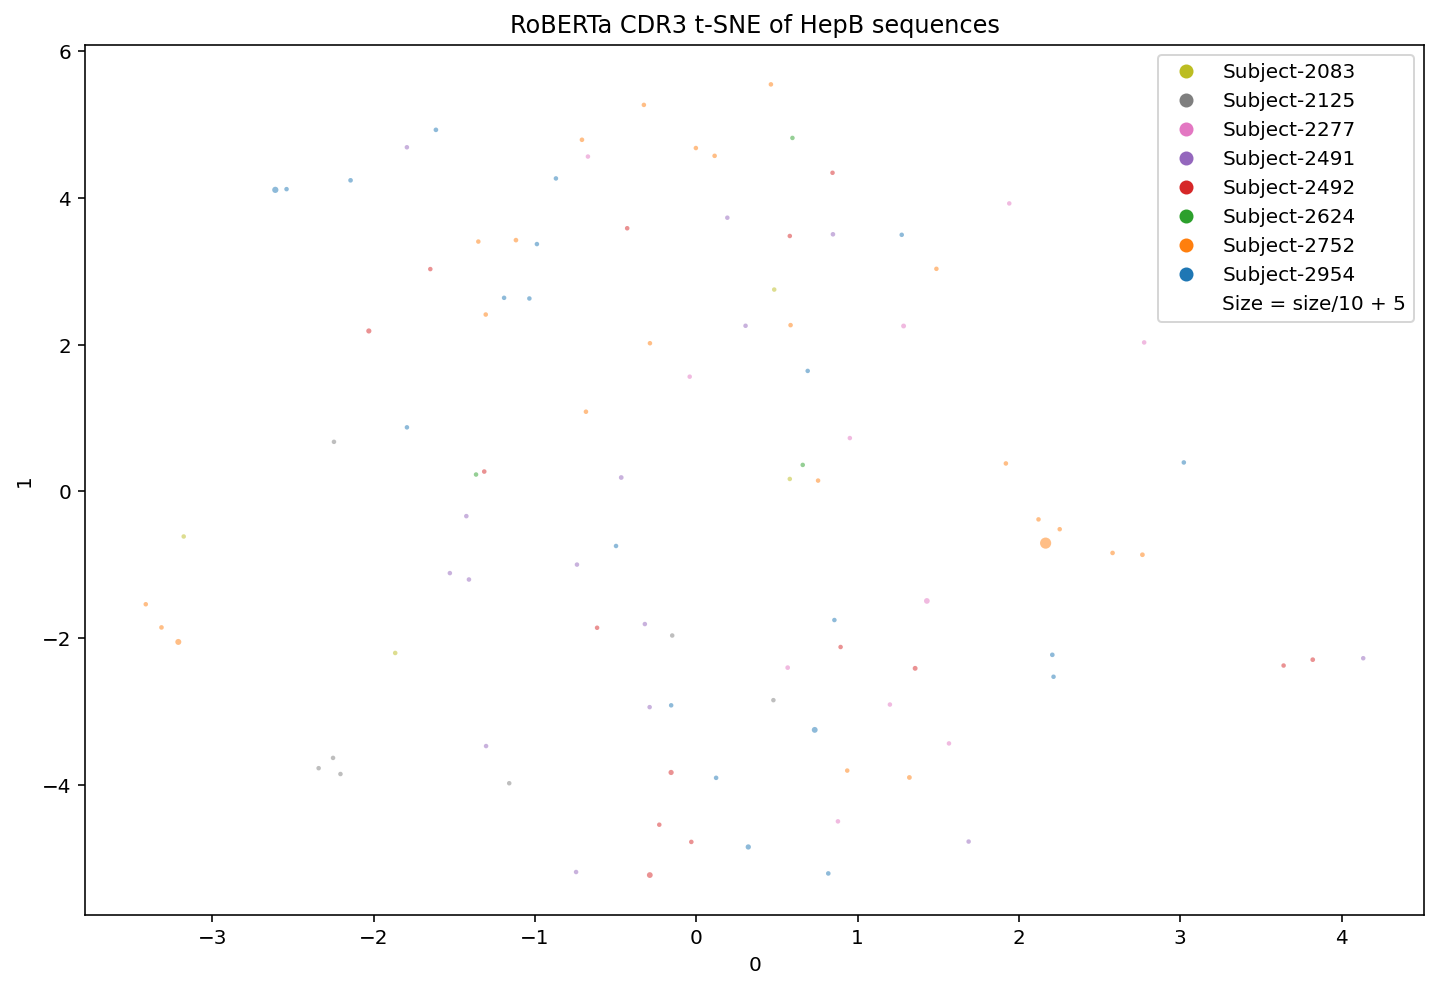

In [48]:
tsne_plot(pos_df)

## All sequences - t-SNE

In [ ]:
all_tsne_output = TSNE(n_components=TSNE_COMPONENTS, perplexity=TSNE_PERPLEXITY, random_state=RANDOM_STATE, n_jobs=-1).fit_transform(features_data)

In [ ]:
all_df = tsne_data(all_tsne_output, features_data, y_data)
all_df

In [ ]:
tsne_plot(all_df, hepb_grouping=True)